#Data Visualization and Statistical Analysis

Dataframes created on the data_ingestion_wrangling_mc, and data_ingestion_wrangling_us scripts will be used here.

##Importing libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib as mpl

##Reading data

In [ ]:
hc_mc = pd.read_excel("hc_mc.xlsx", sheet_name='Sheet1')

In [ ]:
hc_mc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           583 non-null    int64         
 1   incident_date                583 non-null    datetime64[ns]
 2   bias_code                    582 non-null    object        
 3   offense                      582 non-null    object        
 4   case_status                  404 non-null    object        
 5   victim_type                  582 non-null    object        
 6   victim_count                 324 non-null    float64       
 7   suspect_count                248 non-null    float64       
 8   suspects_less_than_18_years  61 non-null     float64       
 9   suspects_18_35_years_old     52 non-null     float64       
 10  suspects_36_45_years_old     23 non-null     float64       
 11  suspects_46_55_years_old     21 non-null     

In [ ]:
hc_us = pd.read_excel("hc_us.xlsx", sheet_name='Sheet1')

In [ ]:
hc_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201376 entries, 0 to 201375
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  201376 non-null  float64
 1   year                201376 non-null  int64  
 2   state               201376 non-null  object 
 3   bias_code           201376 non-null  object 
 4   offense             201376 non-null  object 
 5   victim_type         200063 non-null  object 
 6   victim_count        201376 non-null  int64  
 7   offender_count      201376 non-null  int64  
 8   adult_offenders     32070 non-null   float64
 9   juvenile_offenders  33411 non-null   float64
 10  offender_race       112074 non-null  object 
dtypes: float64(3), int64(3), object(5)
memory usage: 16.9+ MB


##Question 5: What is the median for the number of suspects? What about the mean? Which one is more informative in this case?

In [ ]:
#Choosing a Sample
np.random.seed(180020935)
samp1 = hc_mc.iloc[np.random.randint(low=0, high=hc_mc.shape[0], size=int(round(hc_mc.shape[0]*0.1, 0)))]
samp1.shape

(58, 13)

In [ ]:
#Bootstrapping for the median
from sklearn.utils import resample
samps_medians1 = []
np.random.seed(19042020)
for i in range(1000):
  samps_medians1.append(resample(samp1)["suspect_count"].median())

In [ ]:
#95% confidence interval for the median
ci1 = np.percentile(samps_medians1, [2.5, 97.5])
print(ci1)

[1. 2.]


In [ ]:
#Bootstrapping for the mean
from sklearn.utils import resample
samps_means1 = []
np.random.seed(20200419)
for i in range(1000):
  samps_means1.append(resample(samp1)["suspect_count"].mean())

In [ ]:
#95% confidence interval for the mean
ci2 = np.percentile(samps_means1, [2.5, 97.5])
print(ci2)

[1.32       2.24003448]


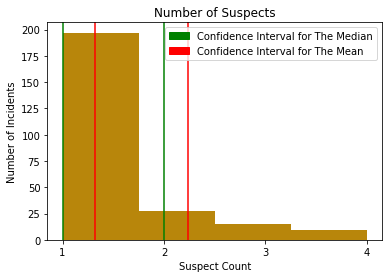

In [ ]:
#Histogram
import matplotlib.patches as mpatches

plt.hist(hc_mc.suspect_count, bins=4, color="darkgoldenrod")
plt.xlabel("Suspect Count")
plt.ylabel("Number of Incidents")
plt.title("Number of Suspects")
plt.xticks(ticks=[1, 2, 3, 4])
plt.axvline(ci1[0], color="green")
plt.axvline(ci1[1], color="green")
plt.axvline(ci2[0], color="red")
plt.axvline(ci2[1], color="red")
plt.legend(handles=[mpatches.Patch(color='green', label='Confidence Interval for The Median'), mpatches.Patch(color='red', label='Confidence Interval for The Mean')])
plt.show()

In [ ]:
#Point estimators
print(hc_mc.suspect_count.median())
print(hc_mc.suspect_count.mean())

1.0
1.3387096774193548


##Question 6: What is the median for the number of victims? What about the mean? Which one is more informative in this case?

In [ ]:
#Choosing a Sample
np.random.seed(18012000)
samp2 = hc_mc.iloc[np.random.randint(low=0, high=hc_mc.shape[0], size=int(round(hc_mc.shape[0]*0.1, 0)))]
samp2.shape

(58, 13)

In [ ]:
#Bootstrapping for the median
from sklearn.utils import resample
samps_medians2 = []
np.random.seed(2000)
for i in range(1000):
  samps_medians2.append(resample(samp2)["victim_count"].median())

In [ ]:
#95% confidence interval for the median
ci3 = np.percentile(samps_medians2, [2.5, 97.5])
print(ci3)

[1. 1.]


In [ ]:
#Bootstrapping for the mean
from sklearn.utils import resample
samps_means2 = []
np.random.seed(18)
for i in range(1000):
  samps_means2.append(resample(samp2)["victim_count"].mean())

In [ ]:
#95% confidence interval for the mean
ci4 = np.percentile(samps_means2, [2.5, 97.5])
print(ci4)

[1.02702703 1.22862637]


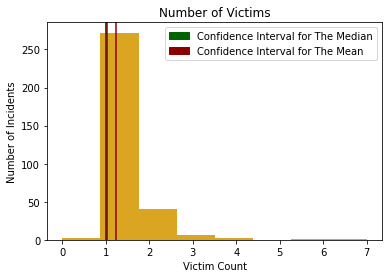

In [ ]:
#Histogram
plt.hist(hc_mc.victim_count, bins=8, color="goldenrod")
plt.xlabel("Victim Count")
plt.ylabel("Number of Incidents")
plt.title("Number of Victims")
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7])
plt.axvline(ci3[0], color="darkgreen")
plt.axvline(ci3[1], color="darkgreen")
plt.axvline(ci4[0], color="darkred")
plt.axvline(ci4[1], color="darkred")
plt.legend(handles=[mpatches.Patch(color='darkgreen', label='Confidence Interval for The Median'), mpatches.Patch(color='darkred', label='Confidence Interval for The Mean')])
plt.show()

In [ ]:
#Point estimators
print(hc_mc.victim_count.median())
print(hc_mc.victim_count.mean())

1.0
1.2067901234567902
